In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
discharge_table=pd.read_csv(r"C:\Users\hp\Downloads\Anas.csv")

In [50]:
discharge_table_ad=discharge_table.iloc[:,1:]

In [51]:
discharge_table_ad

,y (m),a (m),y/a,l'/l,Hw (m),Q (m3/s)
0,0.0326,0.01,3.260,1.0000,0.0158,0.002674
1,0.0403,0.01,4.030,1.0000,0.0180,0.003269
2,0.0445,0.01,4.450,1.0000,0.0187,0.003468
3,0.0503,0.01,5.030,1.0000,0.0198,0.003787
4,0.0549,0.01,5.490,1.0000,0.0204,0.003966
...,...,...,...,...,...,...
372,0.1111,0.05,2.222,1.6667,0.0835,0.034889
373,0.1156,0.05,2.312,1.6667,0.0843,0.035406
374,0.1195,0.05,2.390,1.6667,0.0856,0.036252
375,0.1245,0.05,2.490,1.6667,0.0873,0.037369


In [52]:
def split_data(data,test_size):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    test=int(len(data)*test_size)
    train_indices=shuffle[test:]
    test_indices=shuffle[:test]
    return data.iloc[train_indices],data.iloc[test_indices]

In [53]:
train_data,test_data=split_data(discharge_table_ad,0.2)

In [54]:
train_data

,y (m),a (m),y/a,l'/l,Hw (m),Q (m3/s)
268,0.0477,0.02,2.385000,1.533,0.0421,0.012129
137,0.1212,0.01,12.120000,1.266,0.0360,0.009527
101,0.1657,0.03,0.181050,1.133,0.0627,0.022425
354,0.0772,0.04,1.930000,1.667,0.0652,0.023819
196,0.0450,0.01,4.500000,1.400,0.0276,0.006323
...,...,...,...,...,...,...
71,0.3024,0.01,30.240000,1.133,0.0441,0.013029
106,0.0768,0.03,0.390625,1.133,0.0553,0.018474
270,0.0602,0.02,3.010000,1.533,0.0463,0.014046
348,0.1115,0.03,3.716667,1.667,0.0647,0.023538


In [55]:
test_data

,y (m),a (m),y/a,l'/l,Hw (m),Q (m3/s)
286,0.1114,0.02,5.570000,1.533,0.0633,0.022757
258,0.1101,0.01,11.010000,1.533,0.0381,0.010398
262,0.1751,0.01,17.510000,1.533,0.0443,0.013121
145,0.3459,0.01,34.590000,1.266,0.0529,0.017252
55,0.1134,0.05,2.268000,1.000,0.0716,0.027521
...,...,...,...,...,...,...
63,0.1017,0.01,10.170000,1.133,0.0288,0.006752
266,0.2679,0.01,26.790000,1.533,0.0523,0.016951
181,0.1403,0.04,3.507500,1.266,0.0764,0.030419
332,0.1133,0.01,11.330000,1.667,0.0546,0.018115


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
split_d=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split_d.split(discharge_table_ad,discharge_table_ad["a (m)"]):
    split_train=discharge_table_ad.loc[train_index]
    split_test=discharge_table_ad.loc[test_index]                                    

In [71]:
split_train,split_test

(      y (m)  a (m)      y/a    l'/l  Hw (m)  Q (m3/s)
 358  0.0983   0.04   2.4575  1.6670  0.0710  0.027166
 60   0.1524   0.05   3.0480  1.0000  0.0811  0.033354
 366  0.0859   0.05   1.7180  1.6667  0.0749  0.029503
 324  0.2341   0.01  23.4100  1.6670  0.0507  0.016158
 310  0.1065   0.05   2.1300  1.5330  0.0814  0.033545
 ..      ...    ...      ...     ...     ...       ...
 240  0.1299   0.03   4.3300  1.4000  0.0746  0.029320
 304  0.0794   0.05   1.5880  1.5330  0.0719  0.027699
 141  0.1965   0.01  19.6500  1.2660  0.0426  0.012352
 227  0.1131   0.03   3.7700  1.4000  0.0627  0.022425
 140  0.1713   0.01  17.1300  1.2660  0.0409  0.011600
 
 [301 rows x 6 columns],
       y (m)  a (m)        y/a    l'/l  Hw (m)  Q (m3/s)
 346  0.0947   0.03   3.156667  1.6670  0.0609  0.021439
 263  0.1980   0.01  19.800000  1.5330  0.0468  0.014280
 175  0.0873   0.04   2.182500  1.2660  0.0634  0.022812
 269  0.0529   0.02   2.645000  1.5330  0.0441  0.013029
 207  0.3263   0.01  32.6300

# Looking for Correlations

In [63]:
corr_matrix=discharge_table_ad.corr()

In [64]:
corr_matrix['Q (m3/s)'].sort_values(ascending=False)

Q (m3/s)    1.000000
Hw (m)      0.991929
a (m)       0.793416
l'/l        0.148776
y (m)       0.104416
y/a        -0.368256
Name: Q (m3/s), dtype: float64

From correlation matrix Discharge has a strong positive relationship with parameters Hw and a

In [65]:
discharge_table_ad.describe()

,y (m),a (m),y/a,l'/l,Hw (m),Q (m3/s)
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.140733,0.028541,7.326600,1.324886,0.060060,0.021685
std,0.073713,0.014264,8.264786,0.227600,0.016082,0.008509
min,0.032600,0.010000,0.145068,1.000000,0.015800,0.002674
25%,0.090500,0.020000,2.268000,1.133000,0.047700,0.014706
50%,0.121200,0.030000,3.810000,1.266700,0.061900,0.021985
75%,0.165700,0.040000,8.720000,1.533000,0.072500,0.028176
max,0.438200,0.050000,43.820000,1.667000,0.094200,0.042023


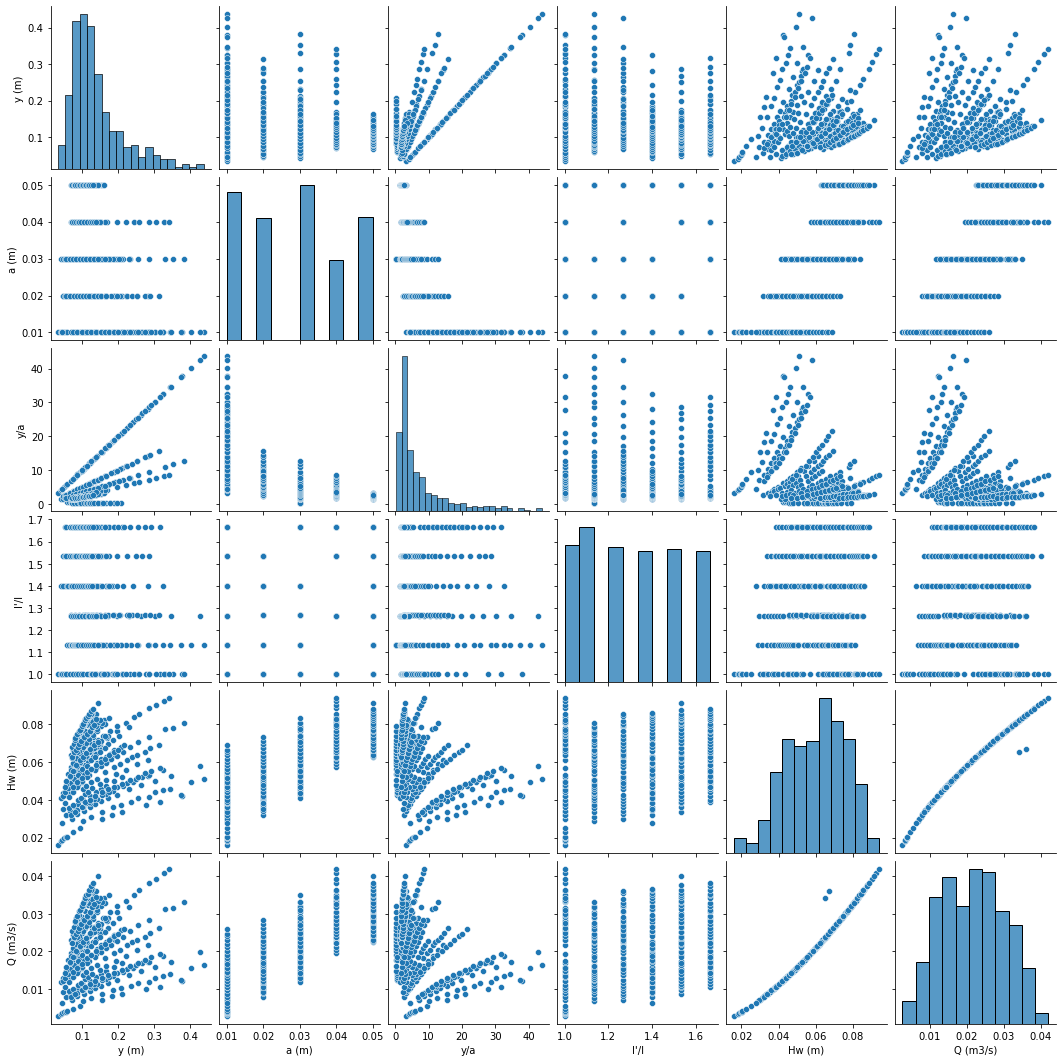

In [66]:
sns.pairplot(discharge_table_ad)

# Selecting a Desired Model for this problem

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [68]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [69]:
models=[lr,dt,rf]

In [90]:
discharge_train=split_train.iloc[:,:-1]
discharge_train_target=split_train.iloc[:,-1]

discharge_test=split_test.iloc[:,:-1]
discharge_test_target=split_test.iloc[:,-1]

discharge_features=discharge_table_ad.iloc[:,:-1]
discharge_targets=discharge_table_ad.iloc[:,-1]

In [92]:
discharge_targets

0      0.002674
1      0.003269
2      0.003468
3      0.003787
4      0.003966
         ...   
372    0.034889
373    0.035406
374    0.036252
375    0.037369
376    0.038098
Name: Q (m3/s), Length: 377, dtype: float64

# By using Root Mean Squared Error

In [112]:
def Rms(models):
    for model in models:
        model.fit(discharge_train,discharge_train_target)
        prepared_discharge=model.predict(discharge_test)
        mse=mean_squared_error(prepared_discharge,discharge_test_target)
        rmse=np.sqrt(mse)
        print("From {} model the root mean squared error came out to be {}".format(model,rmse))
        print(model.predict(discharge_test))

In [113]:
Rms(models)

From LinearRegression() model the root mean squared error came out to be 0.0018385435544976184
[ 0.02196945  0.01449514  0.02354179  0.01322286  0.01919251  0.0181615
  0.03452088  0.02235425  0.0119977   0.01773384  0.01537289  0.01505762
  0.02530678  0.02392916  0.03188711  0.01841203  0.02456007  0.00016816
  0.01158787  0.02791962  0.02284395  0.01410742  0.02837116  0.02516644
  0.01622133  0.02490661  0.0134605   0.02151508  0.01955436  0.01628683
  0.01917991  0.01920358  0.03948037  0.02609898  0.00700786  0.02944656
  0.02416581  0.03660602  0.03162773  0.01473411  0.02832069  0.03016711
  0.03006529  0.02232418  0.03198531  0.01741534  0.02428035  0.02144478
  0.03030331  0.03498538  0.01175848  0.01764459  0.01320306  0.0298959
  0.02889079  0.02292417  0.00710394  0.02564779  0.02548998  0.02712888
  0.02030967  0.03043227  0.01370197  0.01733475  0.01751879  0.01840026
 -0.00019396  0.02590137  0.02011127  0.02056583  0.01520397  0.01883073
  0.00534069  0.03452043  0.014

# Creating a Pipeline

In [122]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
discharge_pipeline=Pipeline([('impute',SimpleImputer(strategy='median')),('std_scale',StandardScaler())])

In [139]:
discharge_data_train=discharge_pipeline.fit_transform(discharge_features)

In [140]:
discharge_data_train.shape

(377, 5)

# By using Cross Validation Score

In [165]:
def cv(models):
    for model in models:
        score=cross_val_score(model,discharge_data_train,discharge_targets,scoring="neg_mean_squared_error",cv=10)
        rmse_score=np.sqrt(-score)
        print("Model Name{}\n Score={}\n Mean={}\n Standard Deviation={}\n\n".format(model,rmse_score,rmse_score.mean(),rmse_score.std()))

In [166]:
cv(models)

Model NameLinearRegression()
 Score=[0.00179759 0.00255479 0.00091635 0.00068431 0.00068905 0.00058047
 0.00058457 0.00042618 0.00069016 0.00083181]
 Mean=0.0009755311230931743
 Standard Deviation=0.0006366338250791086


Model NameDecisionTreeRegressor()
 Score=[2.15537035e-03 2.58701711e-03 1.18508019e-04 9.66029575e-05
 1.36201010e-04 1.24169912e-04 1.21269713e-04 1.07358887e-04
 3.45256889e-04 1.71885072e-03]
 Mean=0.0007510605569837339
 Standard Deviation=0.000940988142042211


Model NameRandomForestRegressor()
 Score=[1.53659994e-03 2.52344770e-03 7.44021774e-05 5.45220799e-04
 1.00658888e-04 1.05082788e-04 7.06513731e-05 4.57677881e-04
 3.07961964e-04 7.24167832e-04]
 Mean=0.0006445871339565012
 Standard Deviation=0.0007570797985989745




In [167]:
def features(model,data):
    fea=np.array([data])
    model_p=model.predict(fea)
    print("Predicted Discharge by {} is {}".format(model,model_p))

In [168]:
data=[0.059,0.01,5.9,1,0.0205]

In [172]:
features(rf,data)

Predicted Discharge by RandomForestRegressor() is [0.00407602]
